In [2]:
import pandas as pd

base_path = "./hist/"
file_prefixes = ["ach_3GPC_fnl0_sim", "ach_3GPC_fnl100_sim"]
simulations = range(1, 101)
columns = list(range(21))

fnl0_data_frames = []
fnl100_data_frames = []

for prefix in file_prefixes:
    for simulation in simulations:
        file_name = f"{base_path}{prefix}{simulation}_biasMatched_moments.txt"
        data = pd.read_csv(file_name, header=None, sep=' ', skiprows=1, usecols=columns)
        if prefix == "ach_3GPC_fnl0_sim":
            data = pd.DataFrame(data.values.flatten()).transpose()
            data = data.iloc[:, 0:126]  # Only up to moment 6 to preserve information
            fnl0_data_frames.append(data)
        elif prefix == "ach_3GPC_fnl100_sim":
            data = pd.DataFrame(data.values.flatten()).transpose()
            data = data.iloc[:, 0:126]  # Only up to moment 6 to preserve information
            fnl100_data_frames.append(data)

fnl0 = pd.concat(fnl0_data_frames)
fnl100 = pd.concat(fnl100_data_frames)

In [4]:
fnl0_train = fnl0.head(80)
fnl0_test = fnl0.tail(20)

fnl100_train = fnl100.head(80)
fnl100_test = fnl100.tail(20)

In [5]:
print(fnl0_train.shape)

(80, 126)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the covariance matrix
cov_fnl0 = np.cov(fnl0_train, rowvar=False)

# Set the mean vector
mean_fnl0 = fnl0_train.mean(axis=0)

# Generate 1000 points from the multivariate normal distribution
sample_fnl0 = np.random.multivariate_normal(mean_fnl0, cov_fnl0, size=10000)


# Calculate the covariance matrix
cov_fnl100 = np.cov(fnl100_train, rowvar=False)
# Set the mean vector
mean_fnl100 = fnl100_train.mean(axis=0)
# Generate 1000 points from the multivariate normal distribution
sample_fnl100 = np.random.multivariate_normal(mean_fnl100, cov_fnl100, size=10000)

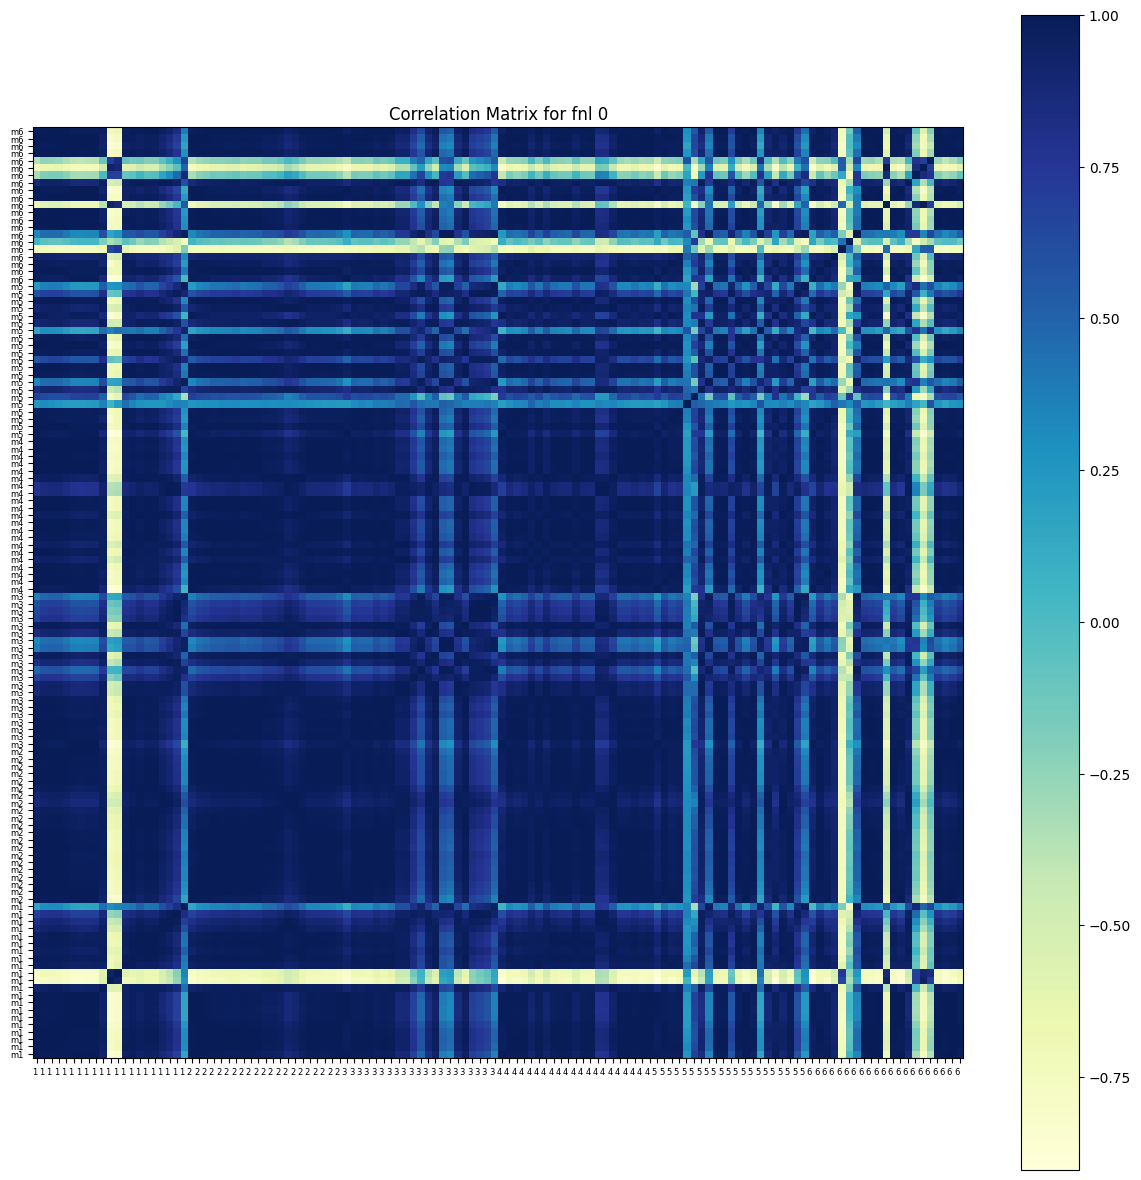

In [7]:
corr_fnl0 = np.corrcoef(cov_fnl0)
fig, ax = plt.subplots(figsize=(15, 15))

im = ax.imshow(corr_fnl0, cmap='YlGnBu')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the x and y axis labels
ax.set_xticks(np.arange(len(corr_fnl0)))
ax.set_yticks(np.arange(len(corr_fnl0)))
ax.set_xticklabels(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
                    '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
                    '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
                    '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
                    '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
                    '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'], fontsize=6)
ax.set_yticklabels(['m1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1',
                    'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2',
                    'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3',
                    'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4',
                    'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5',
                    'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6'], fontsize=6)

# Rotate the x axis labels
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
ax.invert_yaxis()
# Add a title
ax.set_title("Correlation Matrix for fnl 0")

# Show the plot
plt.show()

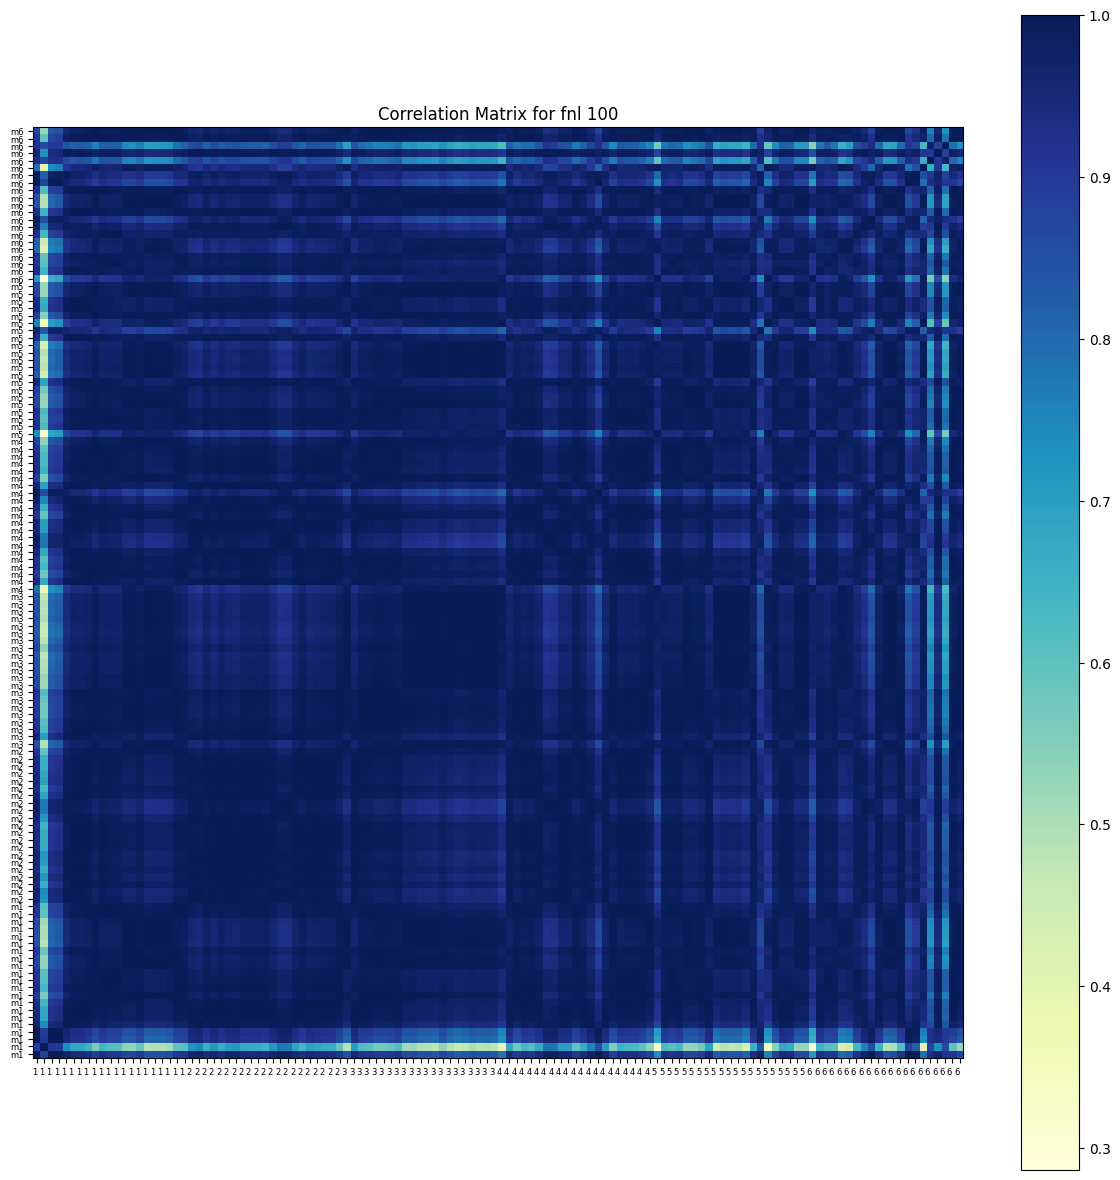

In [8]:
corr_fnl100 = np.corrcoef(cov_fnl100)
fig, ax = plt.subplots(figsize=(15, 15))

im = ax.imshow(corr_fnl100, cmap='YlGnBu')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the x and y axis labels
ax.set_xticks(np.arange(len(corr_fnl100)))
ax.set_yticks(np.arange(len(corr_fnl100)))
ax.set_xticklabels(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
                    '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
                    '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
                    '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
                    '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
                    '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'], fontsize=6)
ax.set_yticklabels(['m1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1', 'm1',
                    'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2', 'm2',
                    'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3', 'm3',
                    'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4', 'm4',
                    'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5', 'm5',
                    'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6', 'm6'], fontsize=6)

# Rotate the x axis labels
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
ax.invert_yaxis()
# Add a title
ax.set_title("Correlation Matrix for fnl 100")

# Show the plot
plt.show()

In [9]:
sfnl0_m1 = sample_fnl0[:, 0:21] # s means sampled from normal
sfnl0_m2 = sample_fnl0[:, 21:42]
sfnl0_m3 = sample_fnl0[:, 42:63]
sfnl0_m4 = sample_fnl0[:, 63:84]
sfnl0_m5 = sample_fnl0[:, 84:105]
sfnl0_m6 = sample_fnl0[:, 105:126]
sfnl0_m7 = sample_fnl0[:, 126:147]

sfnl100_m1 = sample_fnl100[:, 0:21] # s means sampled from normal
sfnl100_m2 = sample_fnl100[:, 21:42]
sfnl100_m3 = sample_fnl100[:, 42:63]
sfnl100_m4 = sample_fnl100[:, 63:84]
sfnl100_m5 = sample_fnl100[:, 84:105]
sfnl100_m6 = sample_fnl100[:, 105:126]
sfnl100_m7 = sample_fnl100[:, 126:147]


print(type(sfnl0_m7))

<class 'numpy.ndarray'>


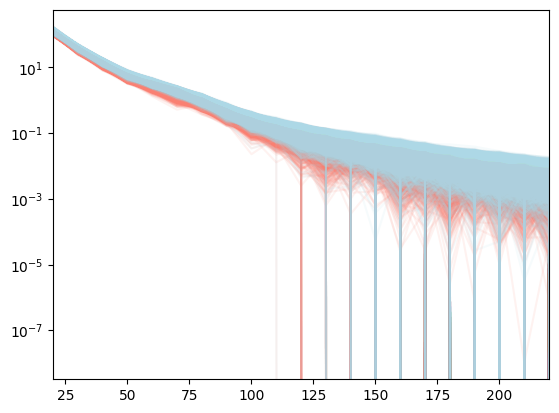

In [10]:
fig, ax = plt.subplots()

x = np.linspace(20, 220, 21)

# # set the x-axis limits
ax.set_xlim([20, 220])

# # plot each row of the array with a faint salmon color

for row in sfnl0_m5:
    ax.plot(x, row, color='salmon', alpha=0.1)

for row in sfnl100_m5:
    ax.plot(x, row, color='lightblue', alpha=0.1)
    
ax.set_yscale("log")
# show the plot
plt.show()

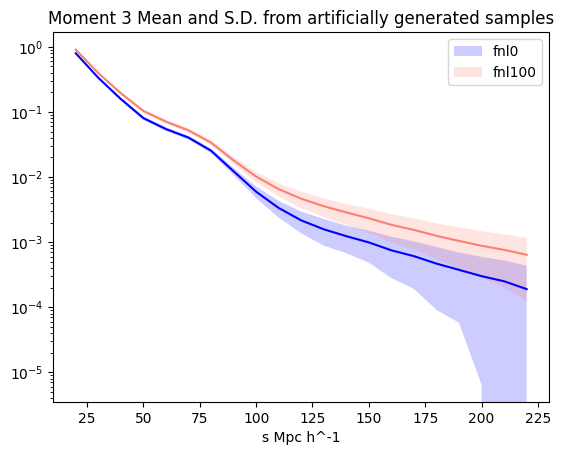

In [11]:
fig, ax = plt.subplots()

x = np.linspace(20, 220, 21)

# # set the x-axis limits
# ax.set_xlim([125, 220])

# # plot each row of the array with a faint salmon color
sfnl0_m3_mean = np.mean(sfnl0_m3, axis=0)
sfnl100_m3_mean = np.mean(sfnl100_m3, axis=0)
sfnl0_m3_std = np.std(sfnl0_m3, axis=0)
sfnl100_m3_std = np.std(sfnl100_m3, axis=0)

ax.plot(x, sfnl0_m3_mean, color="blue")
ax.plot(x, sfnl100_m3_mean, color="salmon")

ax.fill_between(x, sfnl0_m3_mean - sfnl0_m3_std, sfnl0_m3_mean + sfnl0_m3_std, facecolor='blue', alpha=0.2, label='fnl0')
ax.fill_between(x, sfnl100_m3_mean - sfnl100_m3_std, sfnl100_m3_mean + sfnl100_m3_std, facecolor='salmon', alpha=0.2, label='fnl100')

ax.set_yscale("log")
ax.set_xlabel('s Mpc h^-1')

plt.title("Moment 3 Mean and S.D. from artificially generated samples")
plt.legend()
# show the plot
plt.show()

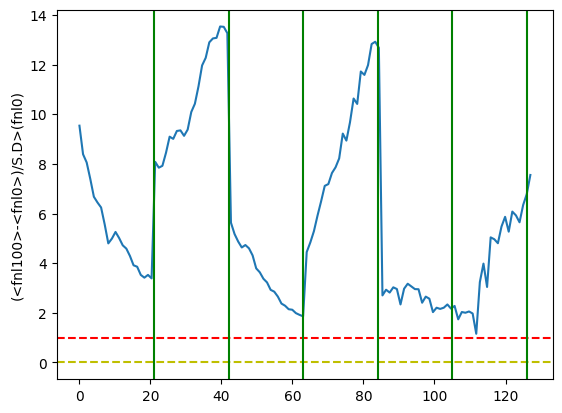

In [12]:
std0 = np.std(fnl0, axis=0)

sigNoi = (mean_fnl100 - mean_fnl0)/ std0

fig,ax = plt.subplots()
xx = np.linspace(0, 127, 126)
ax.plot(xx, sigNoi)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'y', linestyle = '--')

plt.axvline(x = 21, color = 'g', linestyle = '-')
plt.axvline(x = 42, color = 'g', linestyle = '-')
plt.axvline(x = 63, color = 'g', linestyle = '-')
plt.axvline(x = 84, color = 'g', linestyle = '-')
plt.axvline(x = 105, color = 'g', linestyle = '-')
plt.axvline(x = 126, color = 'g', linestyle = '-')

ax.set_ylabel('(<fnl100>-<fnl0>)/S.D>(fnl0)')
plt.show()

# 1D CNN

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split


X0 = np.concatenate([sfnl0_m1, sfnl0_m2, sfnl0_m3, sfnl0_m4, sfnl0_m5, sfnl0_m6], axis=1)
X1 = np.concatenate([sfnl100_m1, sfnl100_m2, sfnl100_m3, sfnl100_m4, sfnl100_m5, sfnl100_m6], axis=1)
X = np.concatenate([X0, X1], axis=0)

num_classA = sfnl0_m1.shape[0]
y = np.concatenate([np.zeros(num_classA), np.ones(num_classA)])

print(X.shape)
print(y.shape)

(20000, 126)
(20000,)


In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

num_classA = sfnl0_m1.shape[0]
y = np.concatenate([np.zeros(num_classA), np.ones(num_classA)])

# Reshape the data for LSTM
max_len = 21
num_features = 6
X = X.reshape(X.shape[0], max_len, num_features)

from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()

# normalize each moment separately
for i in range(6):
    moment_data = X[:, :, i]  # extract the moment data
    moment_data_norm = scaler.fit_transform(moment_data)  # normalize the moment data
    X[:, :, i] = moment_data_norm  # replace the original moment data with the normalized data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(max_len, num_features)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dropout(rate=0.05),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')
])

# Freeze the convolutional layers
model.layers[0].trainable = False
model.layers[1].trainable = False

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)

# Train the model with the TensorBoard callback
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/20
500/500 [==============================] - 4s 5ms/step - loss: 0.0405 - accuracy: 0.9791 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9998 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0103 - accuracy: 0.9999 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0079 - accuracy: 0.9999 - val_loss: 1.0724e-04 - val_accuracy: 1.0000
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Ep

In [23]:
X_unseen = np.concatenate([fnl0_test, fnl100_test])

print(X_unseen.shape)

max_len = 21
num_features = 6
X_unseen = X_unseen.reshape(X_unseen.shape[0], max_len, num_features)

# normalize each moment separately
for i in range(6):
    moment_data = X_unseen[:, :, i]  # extract the moment data
    moment_data_norm = scaler.fit_transform(moment_data)  # normalize the moment data
    X_unseen[:, :, i] = moment_data_norm  # replace the original moment data with the normalized data

(40, 126)


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes of the validation set
y_pred = model.predict(X_unseen)
# y_pred = (y_pred > 0.5).astype(int)

# Create the confusion matrix
# cm = confusion_matrix(y_val, y_pred)

# # Plot the confusion matrix as a heatmap
# sns.heatmap(cm, annot=True, cmap='Blues')
# plt.title("Confusion Matrix for basic 1D CNN")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

print(y_pred)

2/2 [==============================] - 0s 4ms/step
[[-0.02190264]
 [-0.02025213]
 [-0.02232065]
 [-0.02470353]
 [-0.02544817]
 [-0.02554955]
 [-0.02260735]
 [-0.025     ]
 [-0.02136942]
 [-0.03329595]
 [-0.00781067]
 [-0.03284552]
 [-0.02397015]
 [-0.02130576]
 [-0.02348175]
 [-0.02075293]
 [-0.02364936]
 [-0.02166828]
 [-0.02104288]
 [-0.0578843 ]
 [ 0.9792019 ]
 [ 0.9795675 ]
 [ 0.97759765]
 [ 0.978049  ]
 [ 0.98027986]
 [ 0.9772715 ]
 [ 0.9795058 ]
 [ 0.977493  ]
 [ 0.97897303]
 [ 0.9809    ]
 [ 0.9788971 ]
 [ 0.9767806 ]
 [ 0.9772966 ]
 [ 0.97863317]
 [ 0.9768209 ]
 [ 0.9803209 ]
 [ 0.97731245]
 [ 0.9780021 ]
 [ 0.9809516 ]
 [ 0.9812833 ]]


In [35]:
y_fnl0 = y_pred[0:20]
y_fnl100 = y_pred[20:41]

print(y_fnl100.shape)

(20, 1)


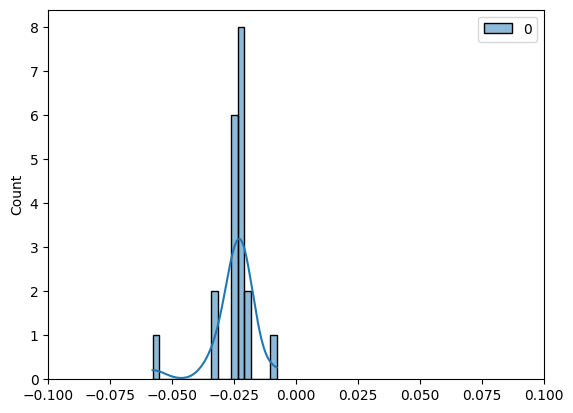

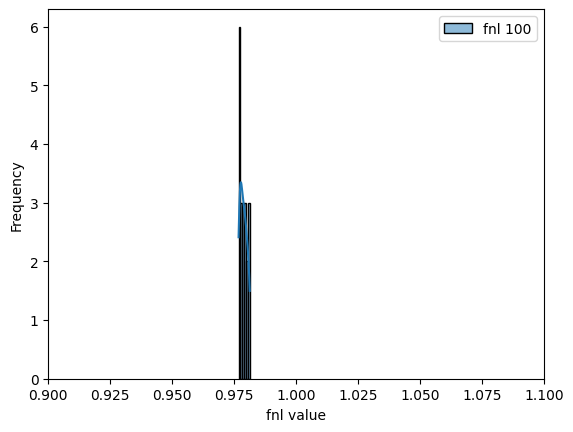

In [40]:
# Create figure 1
plt.figure(1)

# Plot histogram with PDF for array1
sns.histplot(y_fnl0, kde=True, color='skyblue', label='fnl 0')
plt.xlim(-0.1, 0.1)

# Create figure 2
plt.figure(2)

# Plot histogram with PDF for array2
sns.histplot(y_fnl100, kde=True, color='salmon', label='fnl 100')
plt.xlim(0.9, 1.1)

# Adding labels and legend
plt.xlabel('fnl value')
plt.ylabel('Frequency')
plt.legend()

# Display the plots
plt.show()

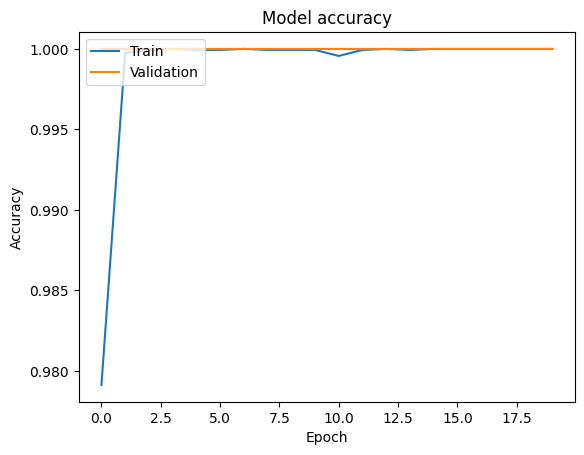

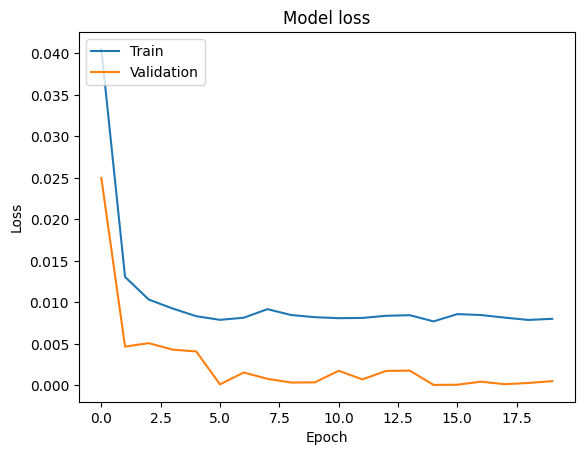

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
